In [ ]:
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def gini(pred_labels, labels):
    n_clusters = 10 #len(np.unique(pred_labels))
    n_points = len(pred_labels)
    count_matrix = np.zeros((n_clusters, n_clusters))
    for i in range(n_points):
        count_matrix[pred_labels[i], labels[i]] += 1
    count_matrix = count_matrix / count_matrix.sum(axis=1)[:, np.newaxis]
    gini = 1 - ((count_matrix ** 2).sum(axis=1).sum() / n_clusters)
    return print("Gini:",gini)


    # Gini index = 1 - sum((gini_cluster1 + gini_cluster2)/N)

In [ ]:
def purity(K,pred_labels,labels):
    
    n_clusters = K #len(np.unique(pred_labels))
    n_points = len(pred_labels)
    #print(n_clusters,n_points)
    count_matrix = np.zeros((n_clusters, n_clusters))

    # Count the number of points in each cluster-true label combination
    for i in range(n_points):
        count_matrix[pred_labels[i], labels[i]] += 1

    row_sums = np.max(count_matrix, axis=1)
    purity = np.sum(row_sums) / n_points
    return print("Purity:",purity)

In [ ]:
(subset_data1, subset_label1), (subset_data2, subset_label2) = mnist.load_data()
subset_data2 = None
subset_label2 = None

X_train, X_test, y_train, y_test = train_test_split(subset_data1,subset_label1, test_size=0.5)

# flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(30000, 784) (30000,) (30000, 784) (30000,)


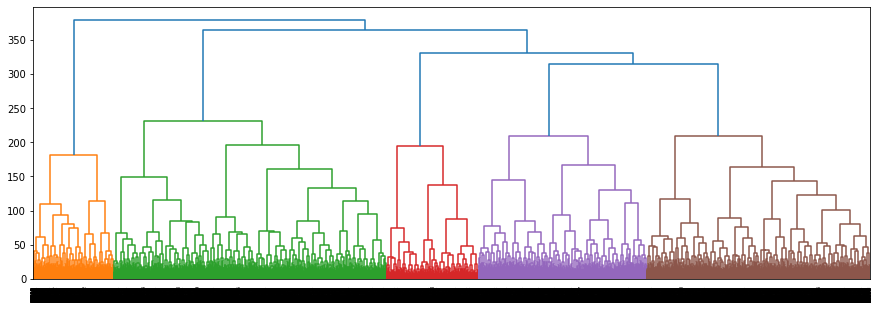

In [ ]:
Z = linkage(X_train, method='ward')
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.show()

In [ ]:
n_clusters = 10  # number of clusters to create
clustering = AgglomerativeClustering(n_clusters=n_clusters) #affinity = "euclidean", linkage = "ward"
clustering.fit_predict(X_train)

array([6, 0, 0, ..., 7, 5, 3])

In [ ]:
purity(10,clustering.labels_,y_train)

Purity: 0.6398333333333334


In [ ]:
gini(clustering.labels_,y_train)

Gini: 0.3645309462940267
